In [162]:
# types of classification
# binary 1 or 0
# multiclass
# multilabel

In [163]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples = 1000

#creating circles

X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [164]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [165]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [166]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [167]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

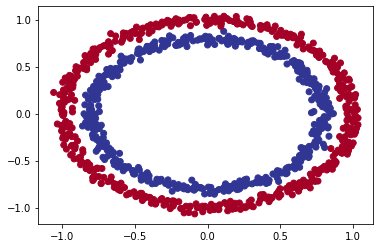

In [168]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [169]:
X.shape, y.shape

((1000, 2), (1000,))

In [170]:
len(X), len(y)

(1000, 1000)

In [171]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [172]:
import tensorflow as tf

tf.random.set_seed(42)

#1 creating a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 modeling
model_1.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.SGD(), metrics = ["accuracy"])

#3 fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4820


In [173]:
#4 improving
model_1.fit(X, y, epochs = 200, verbose = 0)

In [174]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

since I am working on a binary classification problem and my model is getting around ~50% accuracy, it's performing as if it's guessing

In [175]:
tf.random.set_seed(42)

#1 creating a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2 modeling
model_2.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.SGD(), metrics = ["accuracy"])

#3 fit the model
model_2.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010


In [176]:
model_2.fit(X, y, epochs = 200, verbose = 0)

In [177]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935995817184448, 0.5]

In [178]:
# improving again
# maybe with of layers or nodes
# try another optimizations function like adam
# perhaps trayning the model for more epochs

In [179]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

model_3.fit(X, y, epochs = 100, verbose = 0)

In [180]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [181]:
#model_3.predict(X)
x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
x_min, x_max

(-1.1595024599098636, 1.1360036756154805)

In [182]:
import numpy as np
#xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                       np.linspace(y_min, y_max, 100))
#xx, yy

In [183]:
#xx.shape

Visualize the model's prediction:
* create a function. This function will:
 - take in a trained model, features (X) and labels (y)
 - create a meshgrid of the different X values
 - make predictions across the meshgrid
 - plot the predictions as well as a line between zones (where each unique class falss)

In [184]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decisions boundary created by a model predicting on X
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (im gonna make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classifications")
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("doing binary classifications")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifications


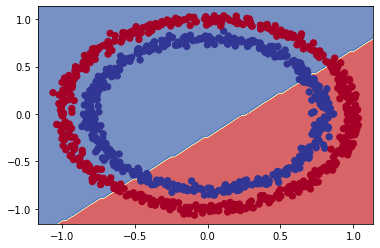

In [185]:
# check out the predicitons my model is making

plot_decision_boundary(model = model_3, X = X, y = y)

In [186]:
# my model is built just to predict regression problems, so i gonna try some regressions

In [187]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [188]:
# model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100)
# at this state my model_3 does not work, the model handles with regression but is built thinking in classifications
# something must changes

In [189]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics = ["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100, verbose = 0)

2/2 [==============================] - 0s 8ms/step


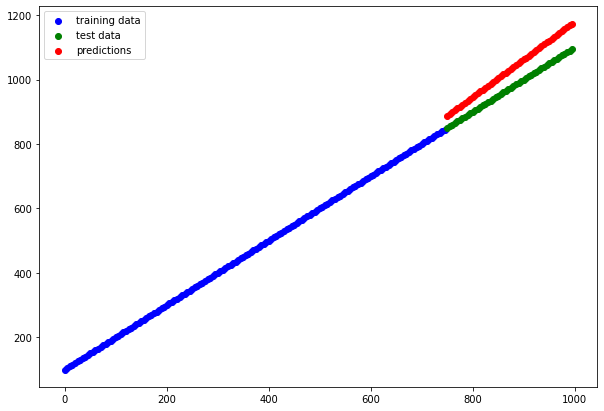

In [190]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c = 'b', label = "training data")
plt.scatter(X_reg_test, y_reg_test, c = 'g', label = "test data")
plt.scatter(X_reg_test, y_reg_preds, c = 'r', label = "predictions")
plt.legend();

In [191]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
x_min, x_max

(-1.1595024599098636, 1.1360036756154805)

In [192]:
y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
y_min, y_max

(-1.1595024599098636, 1.1360036756154805)

In [193]:
np.linspace(x_min, x_max, 100)

array([-1.15950246e+00, -1.13631553e+00, -1.11312860e+00, -1.08994167e+00,
       -1.06675474e+00, -1.04356781e+00, -1.02038088e+00, -9.97193945e-01,
       -9.74007015e-01, -9.50820084e-01, -9.27633153e-01, -9.04446223e-01,
       -8.81259292e-01, -8.58072361e-01, -8.34885431e-01, -8.11698500e-01,
       -7.88511569e-01, -7.65324639e-01, -7.42137708e-01, -7.18950777e-01,
       -6.95763847e-01, -6.72576916e-01, -6.49389985e-01, -6.26203055e-01,
       -6.03016124e-01, -5.79829193e-01, -5.56642263e-01, -5.33455332e-01,
       -5.10268401e-01, -4.87081471e-01, -4.63894540e-01, -4.40707609e-01,
       -4.17520679e-01, -3.94333748e-01, -3.71146817e-01, -3.47959887e-01,
       -3.24772956e-01, -3.01586025e-01, -2.78399095e-01, -2.55212164e-01,
       -2.32025233e-01, -2.08838303e-01, -1.85651372e-01, -1.62464441e-01,
       -1.39277511e-01, -1.16090580e-01, -9.29036495e-02, -6.97167188e-02,
       -4.65297881e-02, -2.33428575e-02, -1.55926816e-04,  2.30310038e-02,
        4.62179345e-02,  

In [194]:
# input_shape=(None, 1), tf.expand_dims(X_reg_train, axis=-1

In [195]:
# the model_3 built previously it isn't able to handle with non-linearity
# now i gonna adjust that

In [196]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, tf.keras.activations.linear)
])

model_4.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])

history = model_4.fit(X, y, epochs = 100, verbose = 0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


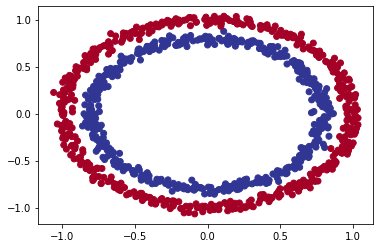

In [197]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifications


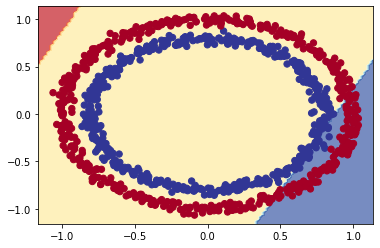

In [198]:
plot_decision_boundary(model = model_4, X = X, y = y)

In [199]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100, verbose = 0)

313/313 [==============================] - 0s 1ms/step
doing binary classifications


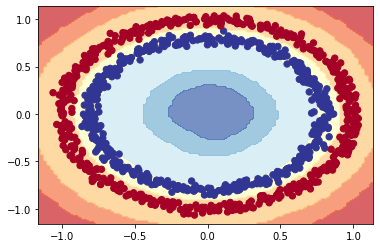

In [200]:
plot_decision_boundary(model = model_5, X = X, y = y)

In [201]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=200, verbose = 0)

In [202]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000


[0.001288814120925963, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifications


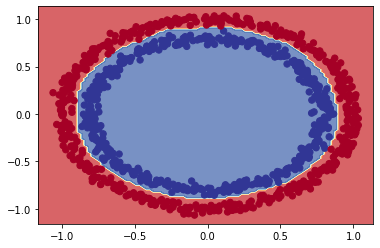

In [203]:
plot_decision_boundary(model = model_6, X = X, y = y)

Better understanding activation functions

In [204]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

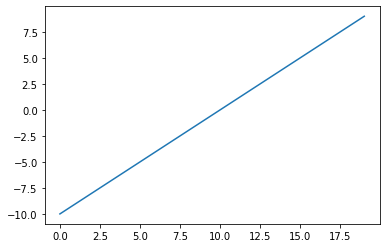

In [205]:
plt.plot(A)

In [206]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [207]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

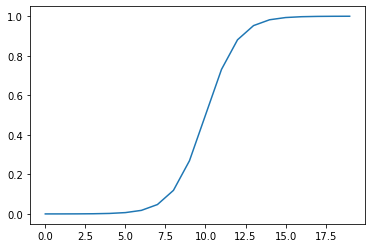

In [208]:
plt.plot(sigmoid(A))

In [209]:
def relu(x):
  return tf.maximum(0, x)

In [210]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

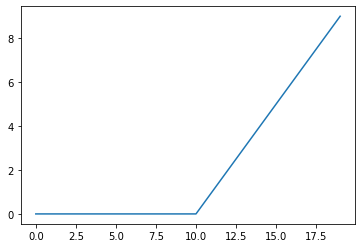

In [211]:
plt.plot(relu(A))

In [212]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [213]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [214]:
len(X)

1000

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
X_train.shape

(800, 2)

In [218]:
# or i could have done it that way:
# X_train, y_train = X[:800], y[:800] # -> stops in pos 800
# X_test, y_test = X[800:], y[800:] # -> starts in pos 800

In [219]:
# recreating a model to fit on the trainin data n evaluate on the test data
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.01), metrics = ["accuracy"])

history = model_7.fit(X_train, y_train, epochs = 56, verbose = 0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [220]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9800


[0.061993006616830826, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classifications
313/313 [==============================] - 0s 1ms/step
doing binary classifications


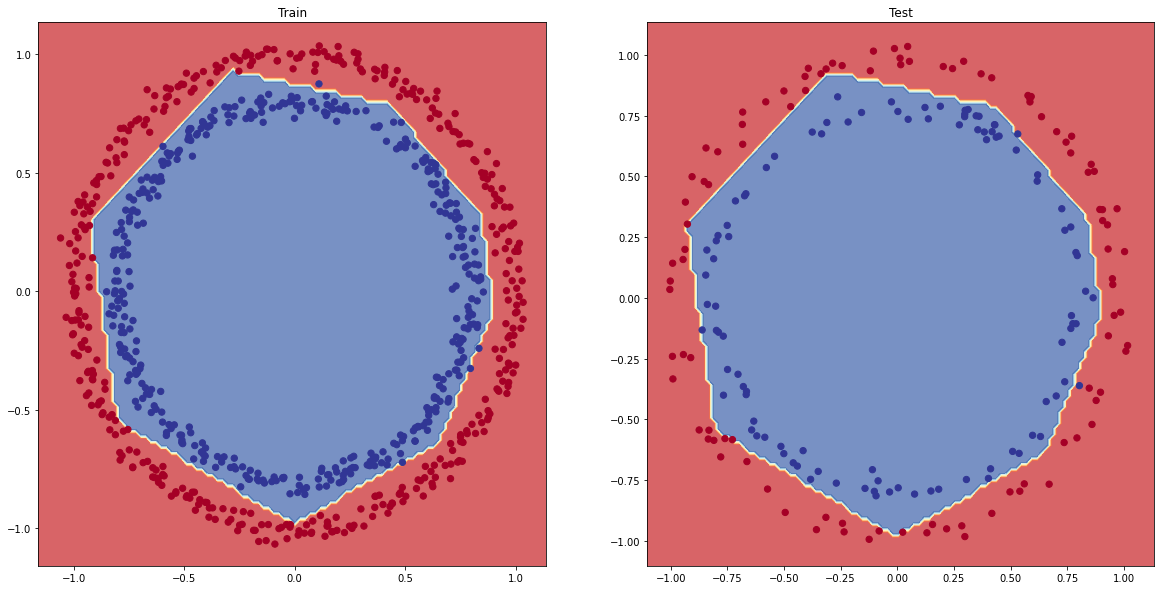

In [221]:
# plot the decision boundaries fot the training e test sets
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model = model_7, X = X_train, y = y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model = model_7, X = X_test, y = y_test)
plt.show()

In [222]:
history.history

{'loss': [0.6823503375053406,
  0.6749704480171204,
  0.6679719686508179,
  0.6634892821311951,
  0.6591553688049316,
  0.6474893689155579,
  0.631162166595459,
  0.6093025803565979,
  0.5843716263771057,
  0.544249951839447,
  0.4914669692516327,
  0.43143412470817566,
  0.3877747654914856,
  0.3405437469482422,
  0.30260786414146423,
  0.2626255452632904,
  0.23670434951782227,
  0.21137742698192596,
  0.19696931540966034,
  0.17787019908428192,
  0.1918766051530838,
  0.1555379033088684,
  0.14786909520626068,
  0.12999549508094788,
  0.14445824921131134,
  0.11218513548374176,
  0.10827228426933289,
  0.096188023686409,
  0.08745840936899185,
  0.08136766403913498,
  0.07781150192022324,
  0.07349678874015808,
  0.06893373280763626,
  0.06380421668291092,
  0.059809084981679916,
  0.05947503075003624,
  0.060677219182252884,
  0.056696608662605286,
  0.04912686347961426,
  0.04732038453221321,
  0.04888378456234932,
  0.043791212141513824,
  0.044479917734861374,
  0.04451775178313

In [223]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125
5,0.647489,0.59375
6,0.631162,0.62750
7,0.609303,0.69625
8,0.584372,0.72125
9,0.544250,0.76750


Text(0.5, 1.0, 'model_7 curves')

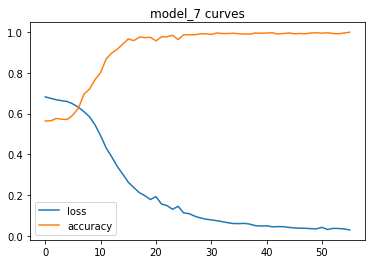

In [224]:
pd.DataFrame(history.history).plot()
plt.title("model_7 curves")

In [225]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_8.fit(X_train, 
                      y_train, 
                      epochs=50,
                      callbacks=[lr_scheduler])

Epoch 1/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6856 -

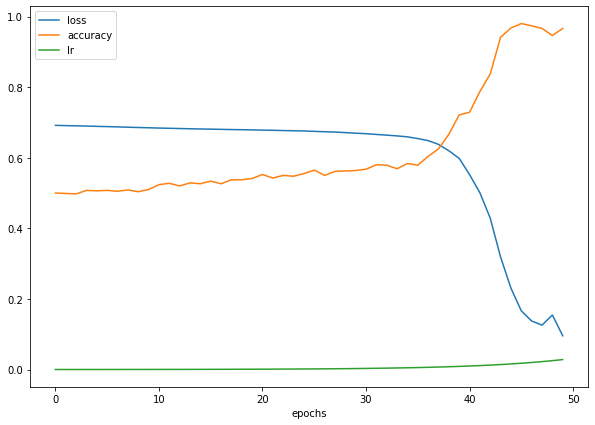

In [226]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

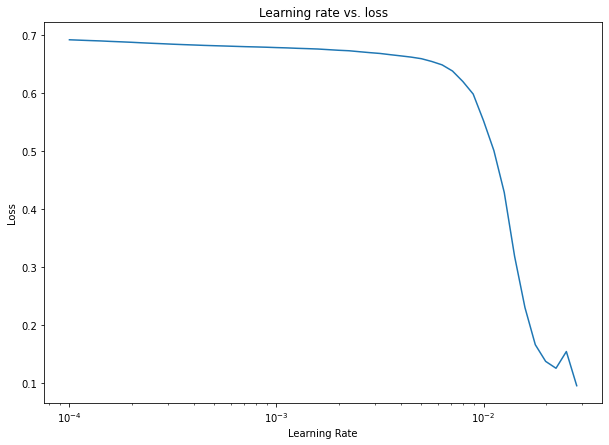

In [227]:
# plot the learning rate vs loss
lrs = 1e-4 * (10 ** (np.arange(50)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [228]:
# about lr = the higher the value, the more the model is gonna update it's internal patterns every epoch

In [229]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_9.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.02), metrics = ["accuracy"])

# call_back

history = model_9.fit(X_train, y_train, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/25
25/25 [===========

In [230]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1072 - accuracy: 0.9750


[0.10717043280601501, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step
doing binary classifications
313/313 [==============================] - 0s 1ms/step
doing binary classifications


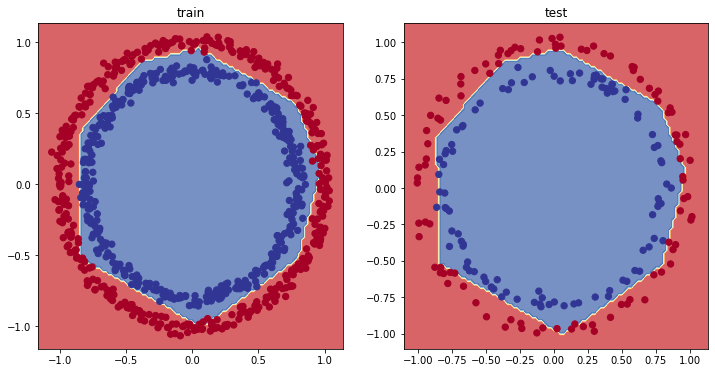

In [231]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

In [232]:
from sklearn.metrics import confusion_matrix

y_preds = model_9.predict(X_test)

# creating a confusion matrix
# confusion_matrix(y_test, y_preds) -> fails 'cause y_test.shape and y_preds.shape have different shapes

7/7 [==============================] - 0s 3ms/step


In [233]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [234]:
y_preds[:10]

array([[0.99733496],
       [0.34712932],
       [0.9964213 ],
       [0.01256989],
       [0.7962179 ],
       [0.8826159 ],
       [0.03776478],
       [0.0349717 ],
       [0.9793736 ],
       [0.21966323]], dtype=float32)

In [235]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [236]:
# creating a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[96,  4],
       [ 1, 99]])

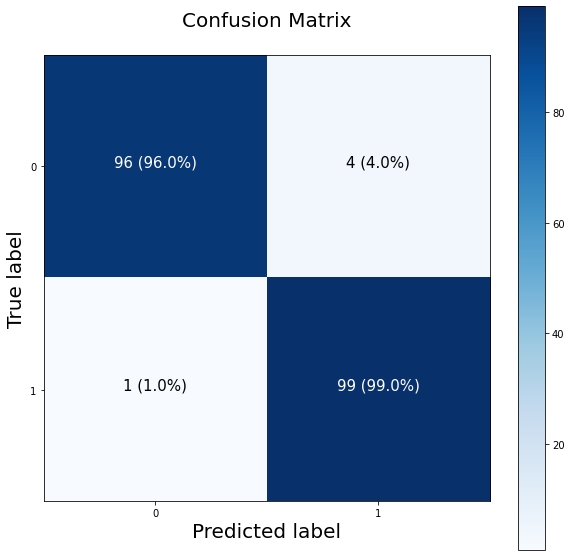

In [237]:
# a remixing of scikir-learn plot_confusing_matrix
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [238]:
cm_norm

array([[0.96, 0.04],
       [0.01, 0.99]])

In [239]:
n_classes = cm.shape[0]

In [240]:
cm.shape[0]

2

In [241]:
from mlxtend.plotting import plot_confusion_matrix

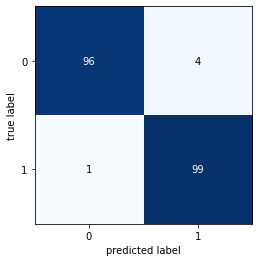

In [243]:
fig, ax = plot_confusion_matrix(confusion_matrix(y_test, tf.round(y_preds)))
plt.show()